In [198]:
import numpy as np
from card import Card
import matplotlib.pyplot as plt

In [46]:
def score_hand(hand):
        flush = hand.sum(axis=0).sum(axis=1)
        is_flush = np.max(flush) >= 5
        card_values = hand.sum(axis=0).sum(axis=0)
        count = 0
        hand_high = 8
        is_stright = False
        stright_high = 5
        for i, s in enumerate(card_values): 
            if s >= 1:
                count += 1
                hand_high = i
                if count >=5:
                    stright_high = i
                    is_stright = True
            else:
                count = 0
        if is_stright and is_flush:
            return 8, stright_high, hand_high    
        is_four_of_a_kind = np.isin(card_values, 4)
        if np.sum(is_four_of_a_kind):
            return 7, np.argwhere(is_four_of_a_kind==True)[0][0], hand_high
        is_three_of_a_kind = np.isin(card_values, 3)
        is_pair = np.isin(card_values, 2)
        if np.sum(is_pair) and np.sum(is_three_of_a_kind):
            return 6, np.argwhere(is_three_of_a_kind==True)[0][0], hand_high
        if is_flush:
            return 5, np.argwhere(hand.sum(axis=0)[np.argmax(flush)]==1)[-1][0], hand_high
        if is_stright:
           return 4, stright_high, hand_high
        if np.sum(is_three_of_a_kind):
            return 3, np.argwhere(is_three_of_a_kind==True)[0][0], hand_high
        if np.sum(is_pair) >= 2:
            return 2, np.argwhere(is_pair==True)[1][0], hand_high
        if np.sum(is_pair):
            return 1, np.argwhere(is_pair==True)[0][0], hand_high
        return 0, 0, hand_high

In [236]:
scores = {}

num_cards = 7
iters = 100
histos = np.zeros((52,52,9))
for c1 in range(52):
    for c2 in range(52):
        if c1==c2:continue
        hand_cards = [c1,c2]
        histo = np.zeros((9))
        for i in range(iters):
            deck = np.arange(52)
            deck = np.delete(deck, hand_cards)
            np.random.shuffle(deck)
            deck = deck.tolist()
            cards = np.zeros((num_cards,52))
            for i, c in enumerate(hand_cards):
                cards[i,:] = Card(c).vec
            for i in range(len(hand_cards),num_cards):
                cards[i,:] = Card(deck.pop()).vec
            cards = cards.reshape(num_cards,4,13)
            histo[score_hand(cards)[0:1]] += 1
        score = 0
        for i in range(9):
            score += (i+1)*histo[i]/iters
        scores[c1,c2] = score
        histos[c1,c2,:] = histo
np.save('2_card_values_'+str(iters)+'.npy', scores)
scores

array([[0.    , 2.5805, 2.624 , ..., 2.3909, 2.3543, 2.3382],
       [2.618 , 0.    , 2.6772, ..., 2.3966, 2.3735, 2.3742],
       [2.6443, 2.6602, 0.    , ..., 2.4006, 2.3746, 2.3647],
       ...,
       [2.3505, 2.4086, 2.4089, ..., 0.    , 2.6523, 2.6012],
       [2.3441, 2.3812, 2.3912, ..., 2.6637, 0.    , 2.5733],
       [2.3463, 2.3604, 2.374 , ..., 2.5813, 2.5968, 0.    ]])

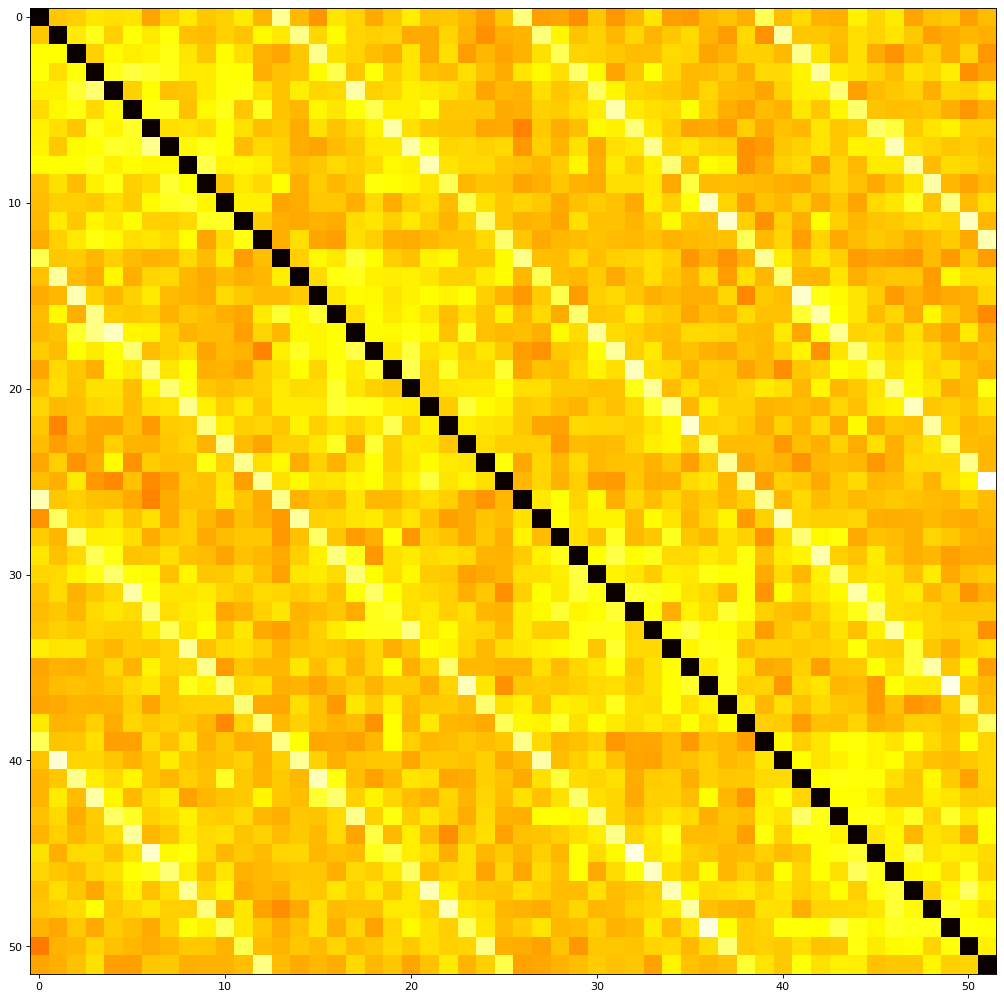

In [231]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.show()

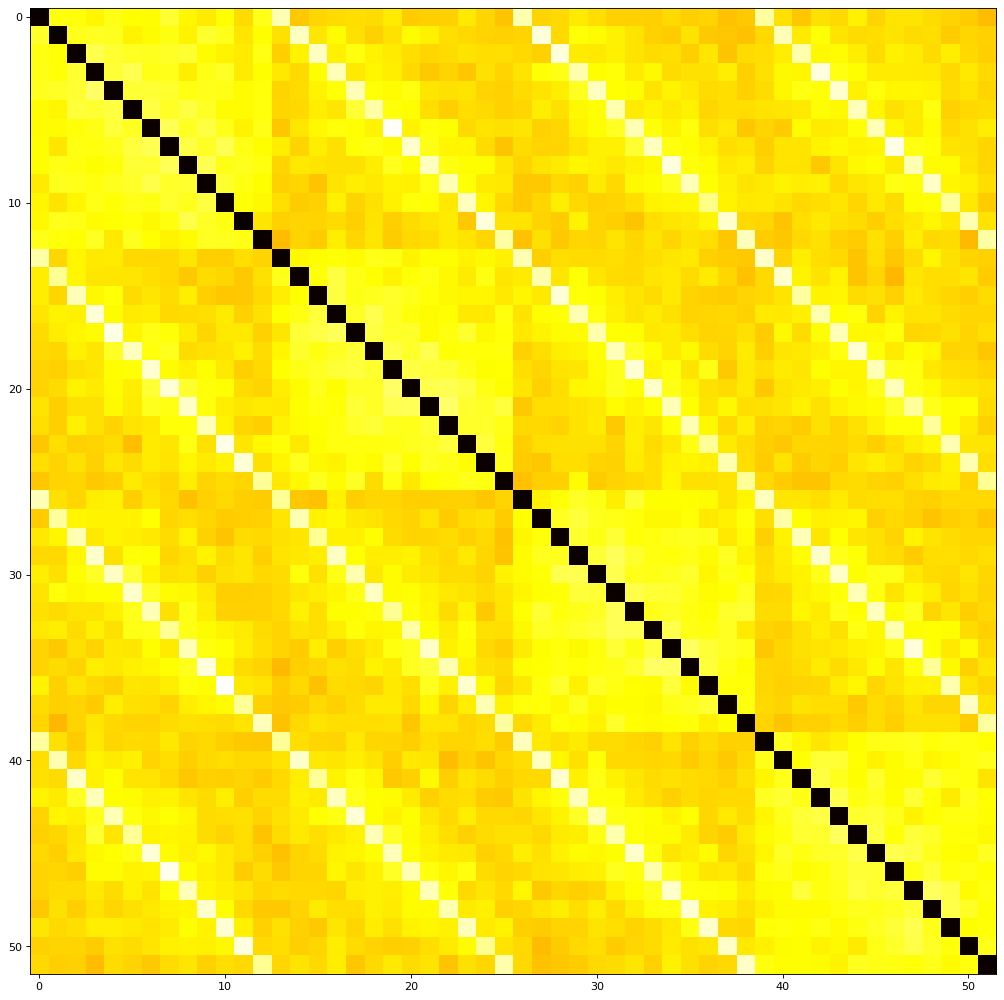

In [233]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.show()

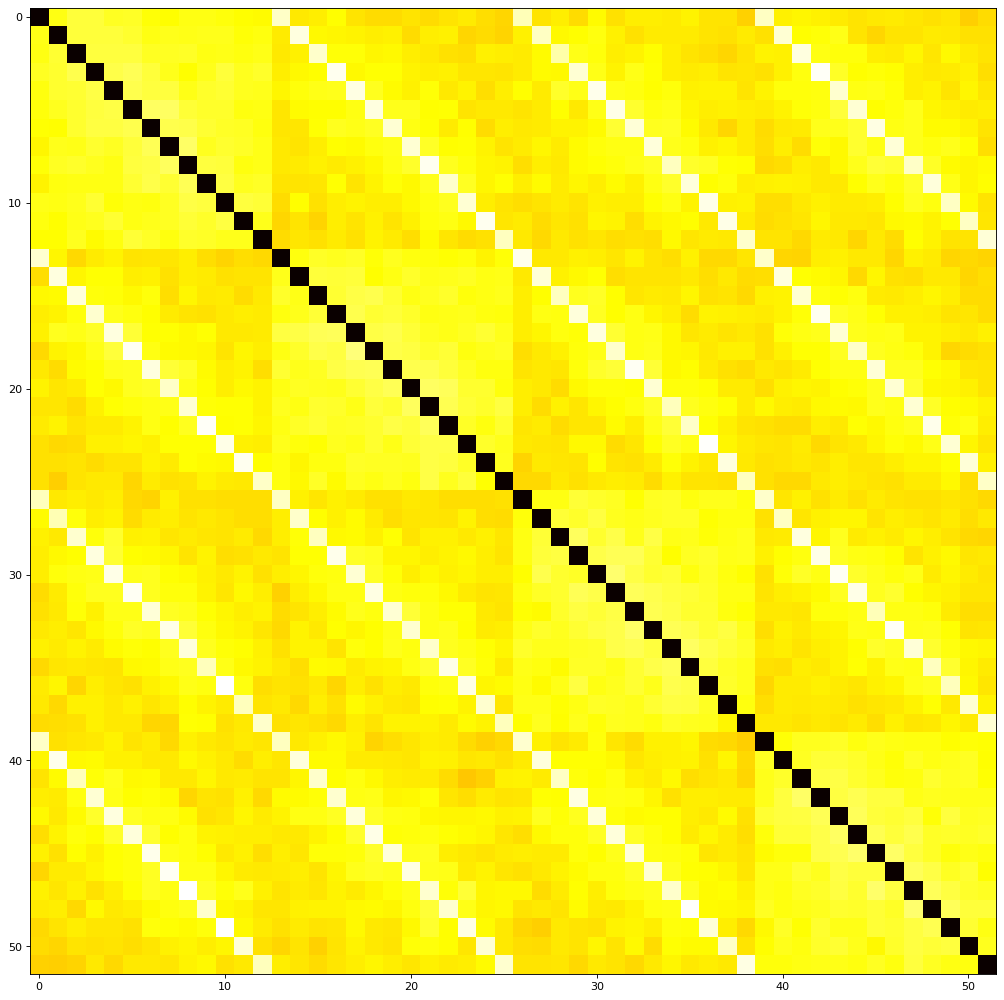

In [227]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.show()

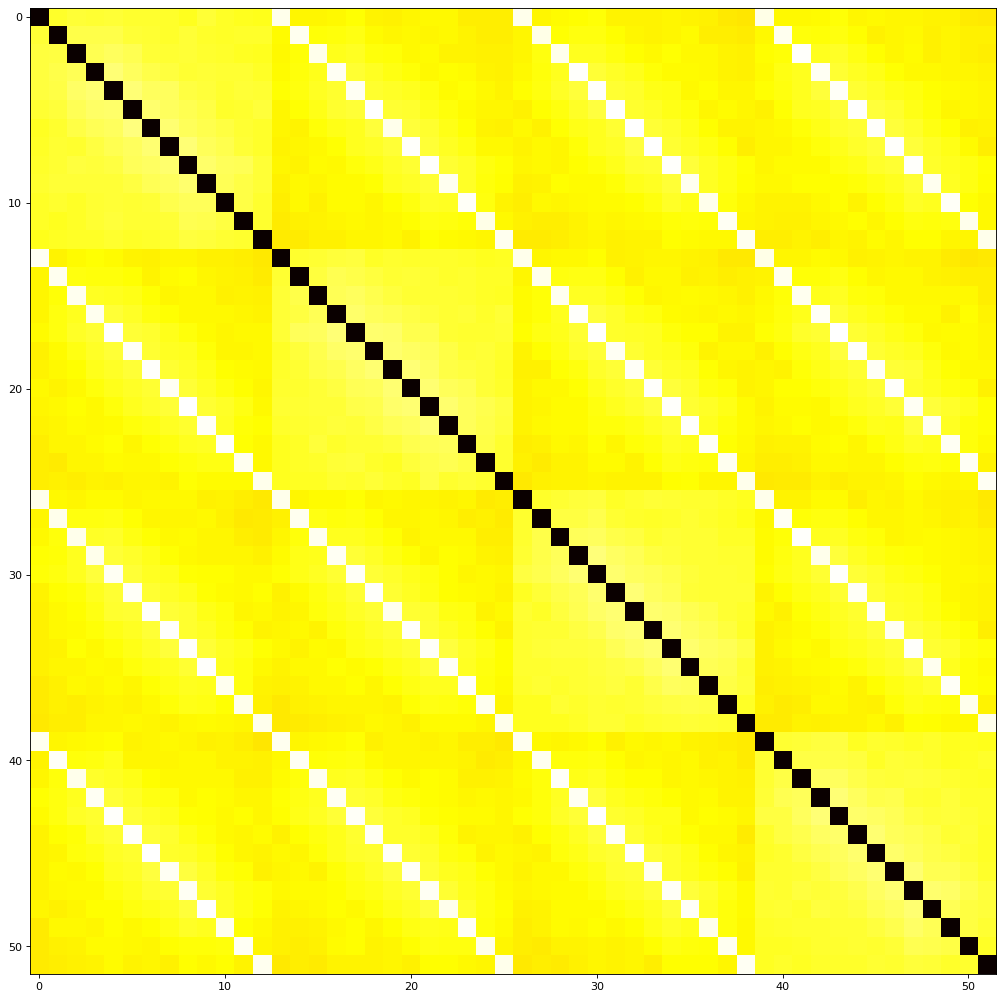

In [237]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.show()